# Lab05 - Image Processing and Analysis
Full name: Đinh Anh Huy - ID Student: 18110103

In [1]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from pylab import imread
from skimage.color import rgb2gray
import pywt
import pywt.data
from pywt import dwt2, idwt2
import warnings
warnings.filterwarnings('ignore')

In [2]:
def ShowImage(ImageList, nRows = 1, nCols = 2, WidthSpace = 0.00, HeightSpace = 0.00, title = None):
    gs = gridspec.GridSpec(nRows, nCols)
    gs.update(wspace=WidthSpace, hspace=HeightSpace) # set the spacing between axes.
    plt.figure(figsize=(20,10))
    for i in range(len(ImageList)):
        ax1 = plt.subplot(gs[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        
        plt.subplot(nRows, nCols, i+1)
        
        image = ImageList[i].copy()
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
        if title:
            plt.title(title[i])
        else:
            plt.title("Image " + str(i+1))
        plt.axis('off')
    plt.show()

In [3]:
def read_image(img_name):
    img_color = imread(img_name)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
    img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)
    return (img_color, img_gray, img_hsv)

In [4]:
cmapList = [cm.gray, cm.jet, cm.rainbow, cm.viridis, cm.cubehelix, cm.RdBu]

def show_result_wavelet_transform(list_result, title = None, cmap = cm.RdBu):
    titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
    fig = plt.figure(figsize=(20,10))
    if title:
        fig.suptitle(title, fontsize = 15)
    for i, a in enumerate(list_result):
        ax = fig.add_subplot(2, 2, i + 1)
        ax.imshow(a, interpolation="nearest", cmap=cmap)
        ax.set_title(titles[i], fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

## Bài tập 1
Kiếm một ảnh trên internet và thực hiện tất cả các biến đổi wavelet '**db5**', '**sym5**', '**coif5**', '**bior1.3**', '**haar**' ở mức 1 và 2 (two level decomposition)

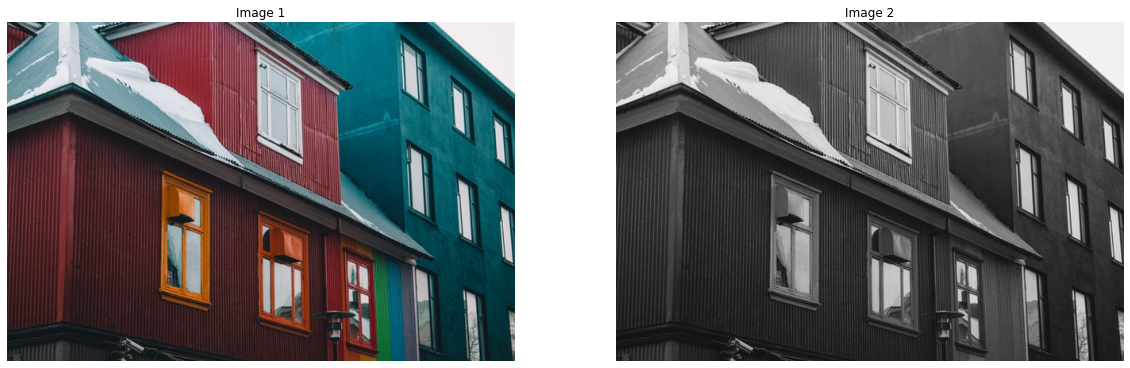

In [5]:
# Read Image
img_color, img_gray = read_image("house1.jpg")[:2]
# Display Image
ShowImage([img_color, img_gray], 1, 2)

In [6]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior1.3', 'haar']

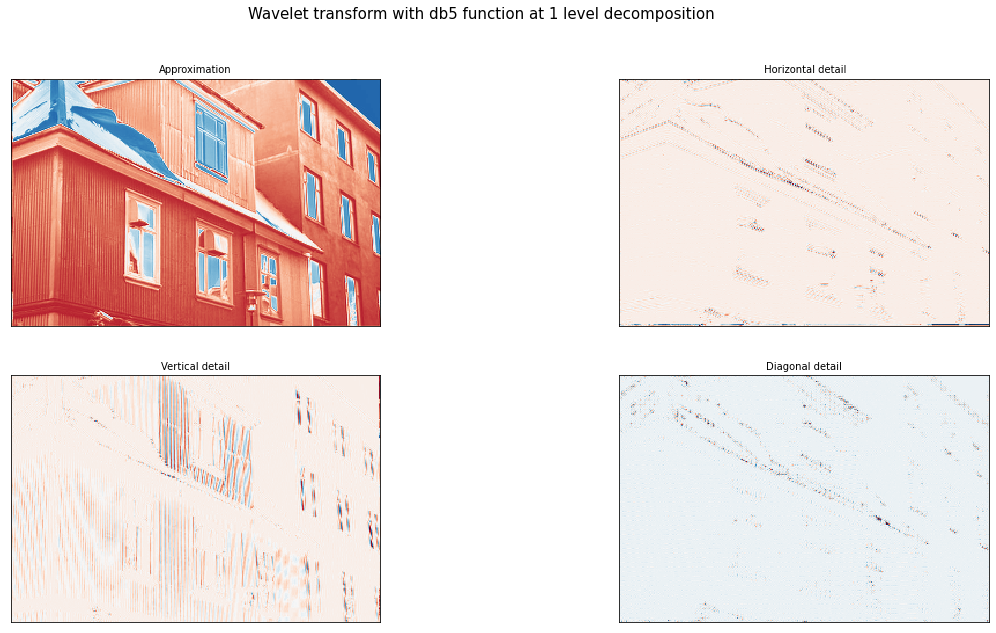

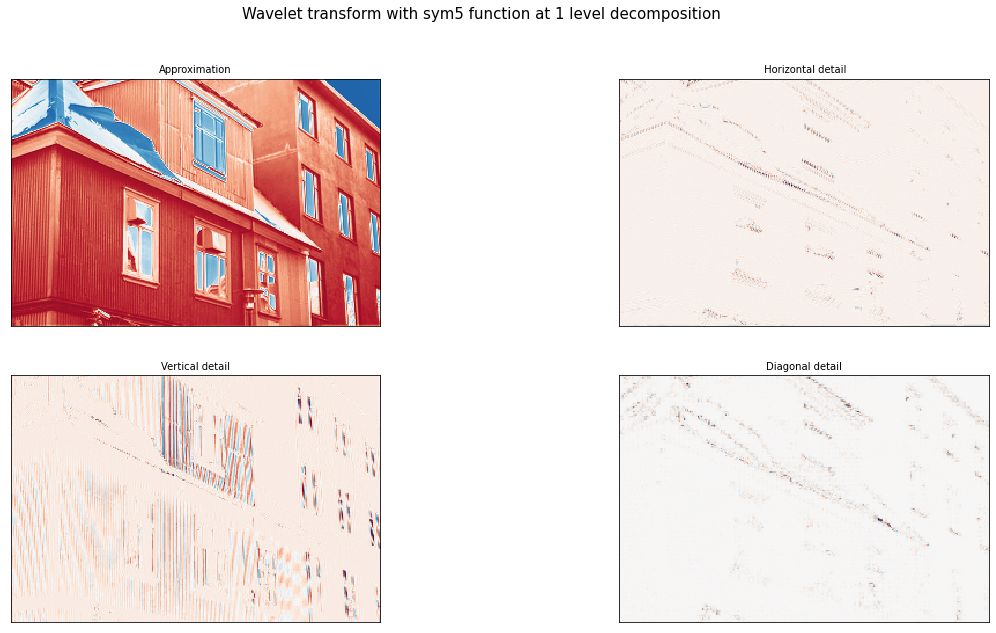

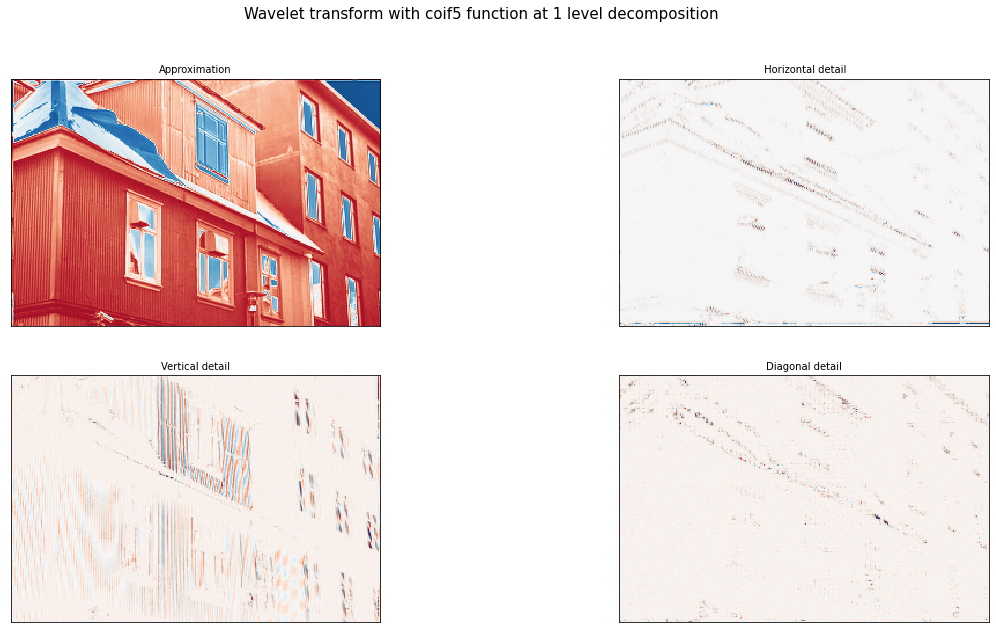

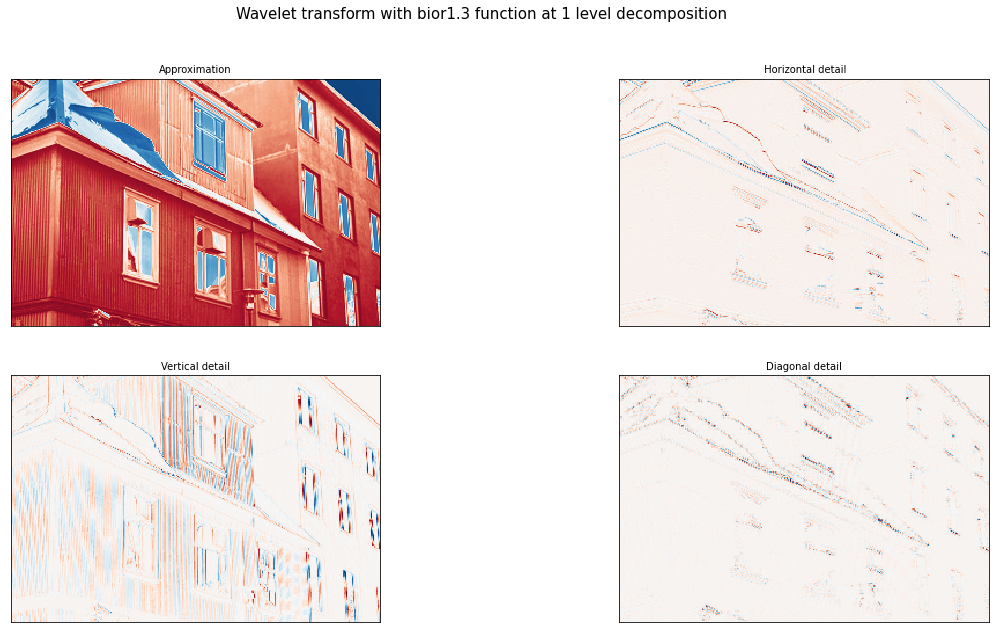

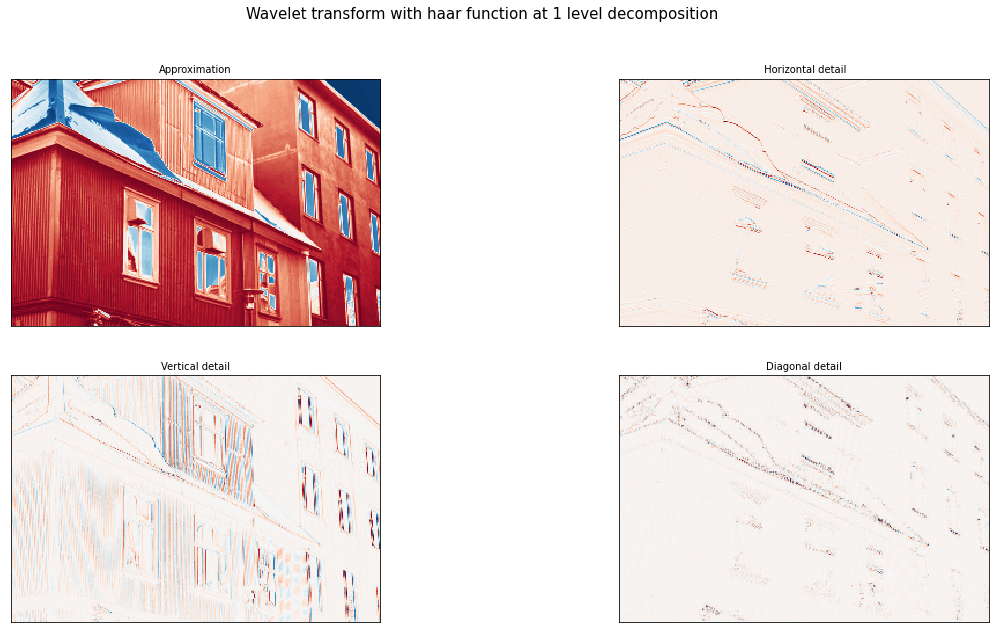

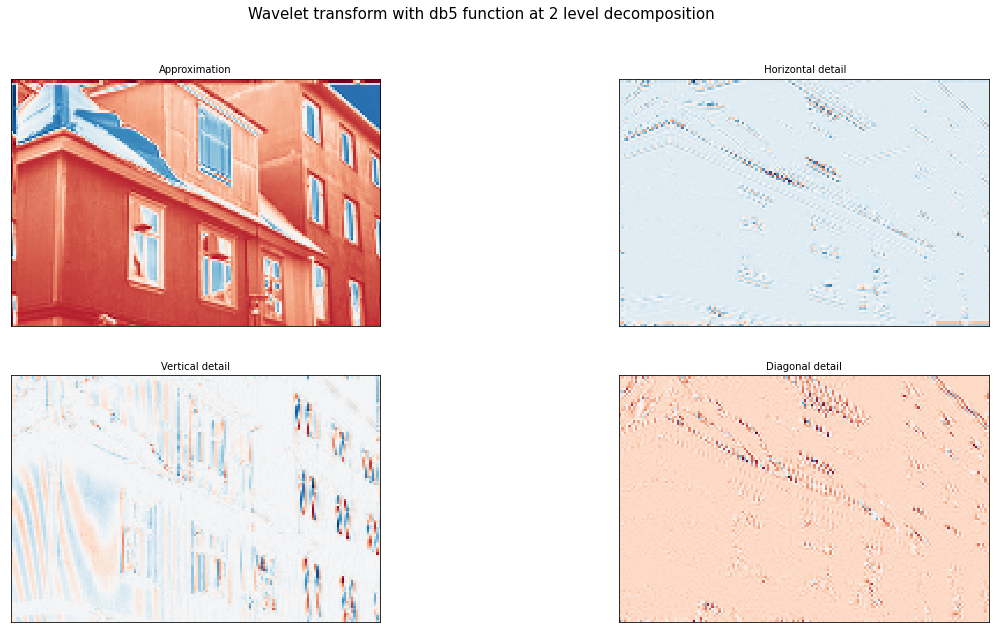

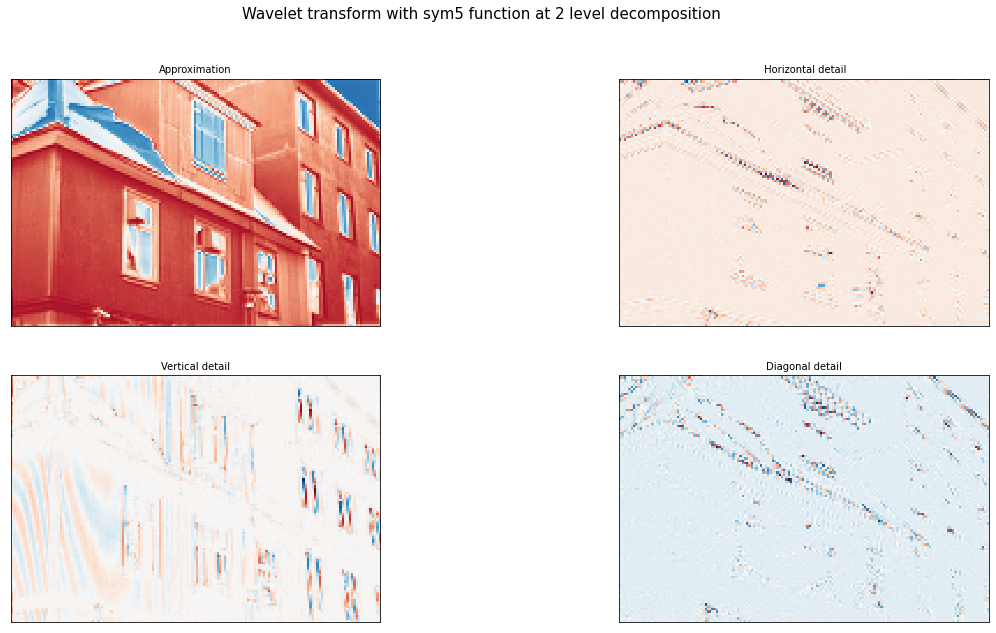

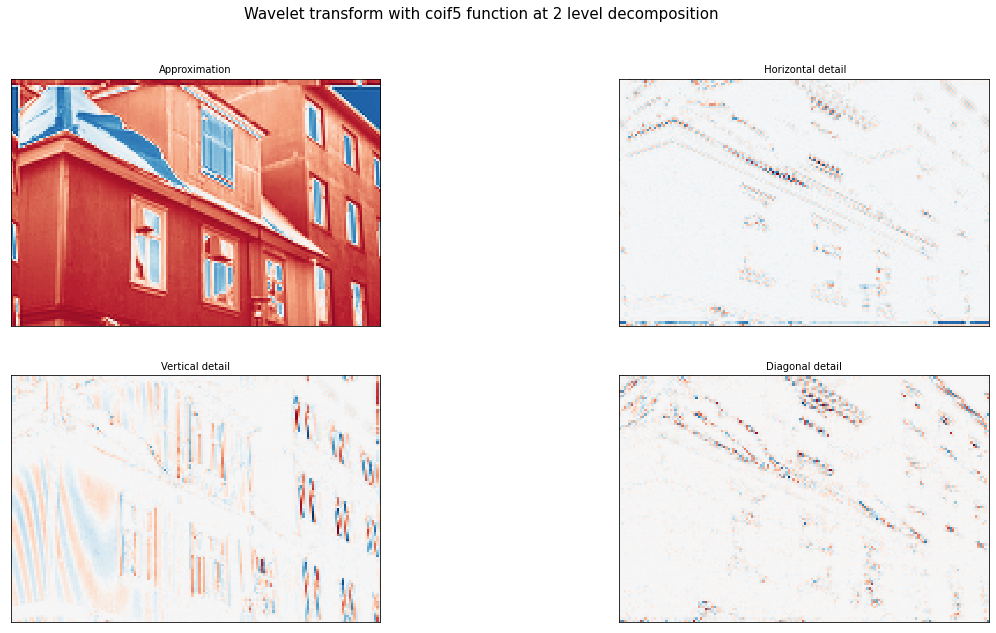

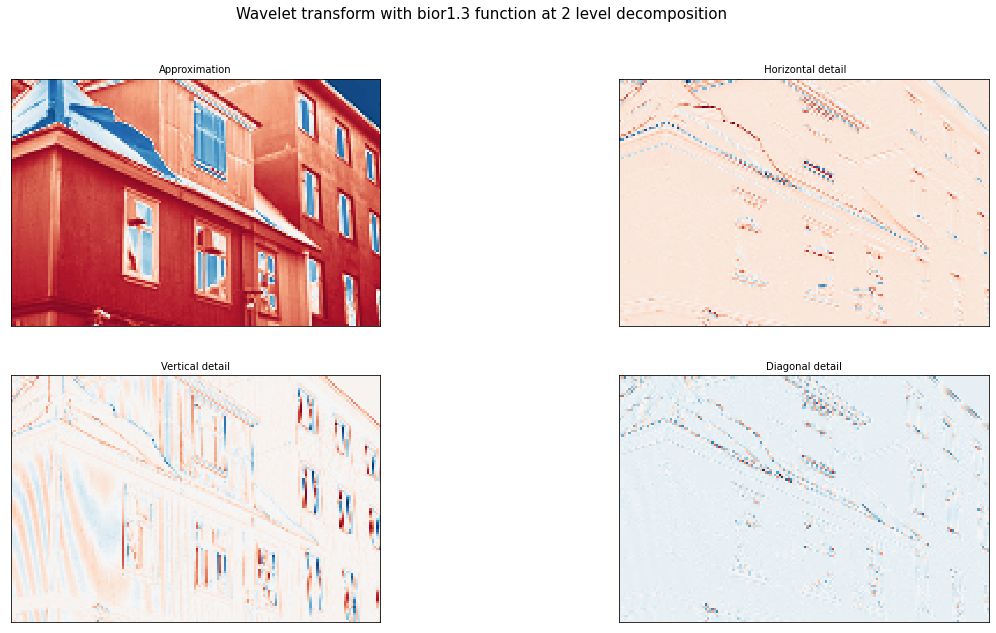

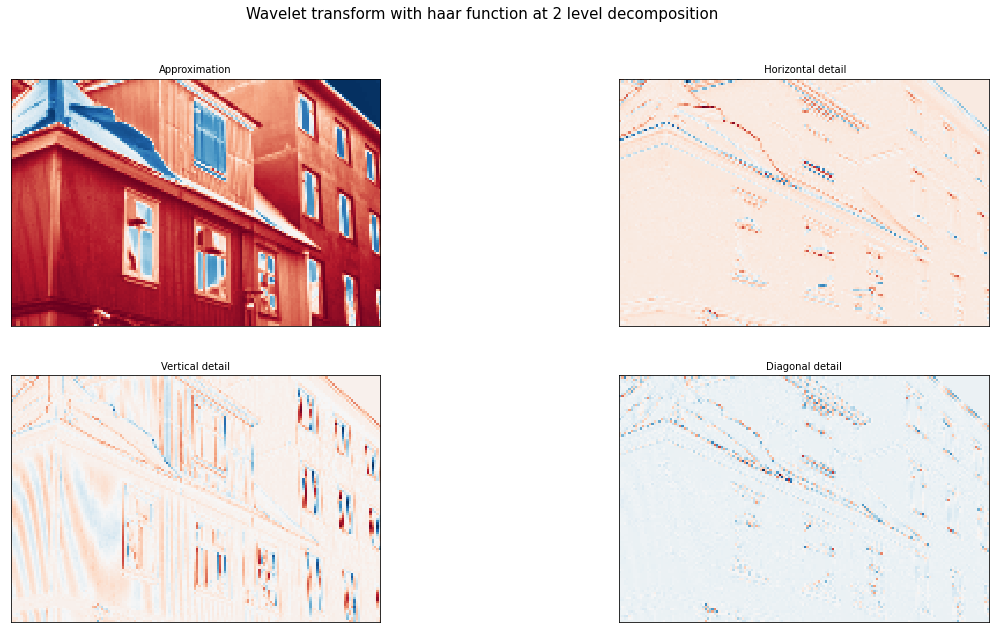

In [7]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
for level in range(1,3):
    for function in discrete_wavelets:
        x = img_gray.astype(np.float32)
        coeffs2 = pywt.wavedec2(x, function, mode='periodization', level=level)
        LL, (LH, HL, HH) = coeffs2[:2]
        title = "Wavelet transform with " + function + " function at "\
                     + str(level) + " level decomposition"
        show_result_wavelet_transform([LL, LH, HL, HH], title, cmapList[-1])

## Bài tập 2
Viết một hàm trong đó truyền các tham số là hình ảnh cẩn biền đổi, function wavelet dùng ('**db5**', '**sym5**', '**coif5**', '**bior1.3**', '**haar**') và level biến đổi. Giá trị trả về là ảnh xấp xỉ và các ảnh detail. Kiểm tra kết quả với một bức ảnh kiếm từ internet  

In [8]:
def wavelet_transform(image, func_wavelet, level=None, mode = 'periodization'):
    x = image.astype(np.float32)
    coeffs2 = pywt.wavedec2(x, func_wavelet, mode='periodization', level=level)
    LL, (LH, HL, HH) = coeffs2[:2]
    return LL, (LH, HL, HH), coeffs2

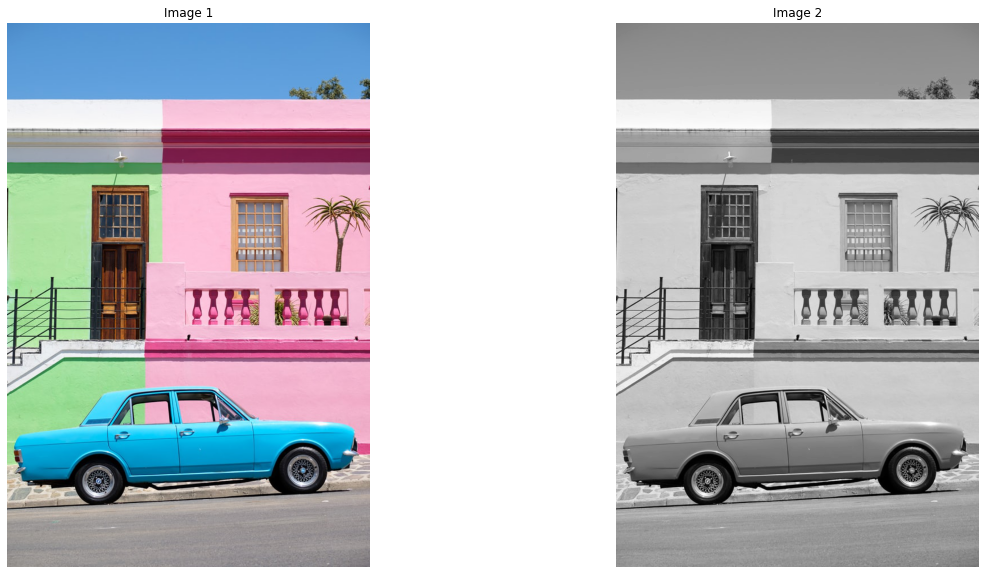

In [9]:
# Read Image
img_color, img_gray = read_image("color2.jpg")[:2]
# Display Image
ShowImage([img_color, img_gray], 1, 2)

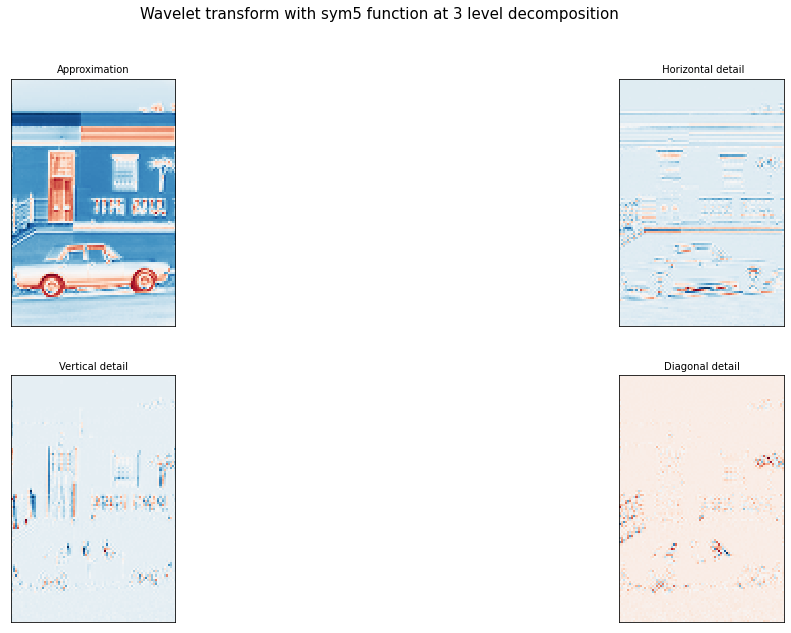

In [10]:
function = discrete_wavelets[1]
level = 3
LL, (LH, HL, HH) = wavelet_transform(img_gray, function, level)[:2]
title = "Wavelet transform with " + function + " function at "\
                     + str(level) + " level decomposition"
show_result_wavelet_transform([LL, LH, HL, HH], title, cmapList[-1])

## Bài tập 3
**Kiếm một ảnh từ internet.**

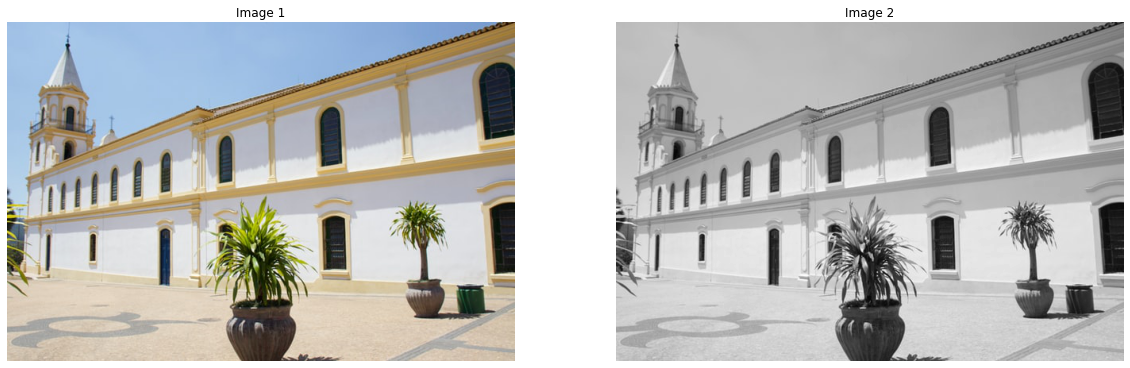

In [11]:
# Read Image
img_color, img_gray = read_image("house3.jpg")[:2]
# Display Image
ShowImage([img_color, img_gray], 1, 2)

**Thực hiện biến đổi wavelet để phân rã thành ảnh xấp xỉ và ảnh detail.**

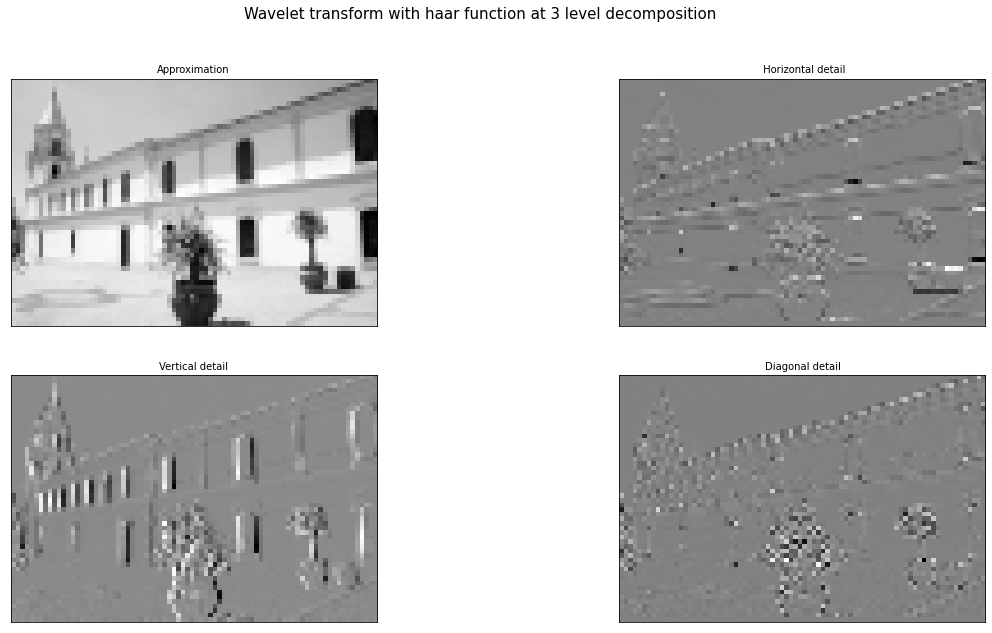

In [12]:
function = discrete_wavelets[-1]
level = 3
LL, (LH, HL, HH), coeffs2 = wavelet_transform(img_gray, function, level)
title = "Wavelet transform with " + function + " function at "\
                     + str(level) + " level decomposition"
show_result_wavelet_transform([LL, LH, HL, HH], title, cmapList[0])

 **Sau đó tiến hành các bước sau:**

In [13]:
def restore_image(list_wavelet_trans, coeffs2, wavelet, mode = 'periodization'):
    arr0 = list_wavelet_trans[0]
    list_arr1 = list_wavelet_trans[1:]
    coeffs2[0:2] = [arr0, list_arr1]
    res_image = pywt.waverec2(coeffs2, wavelet=wavelet, mode=mode)
    return res_image

* Khôi phục ảnh gốc từ **ảnh detail** và **ảnh approximation**

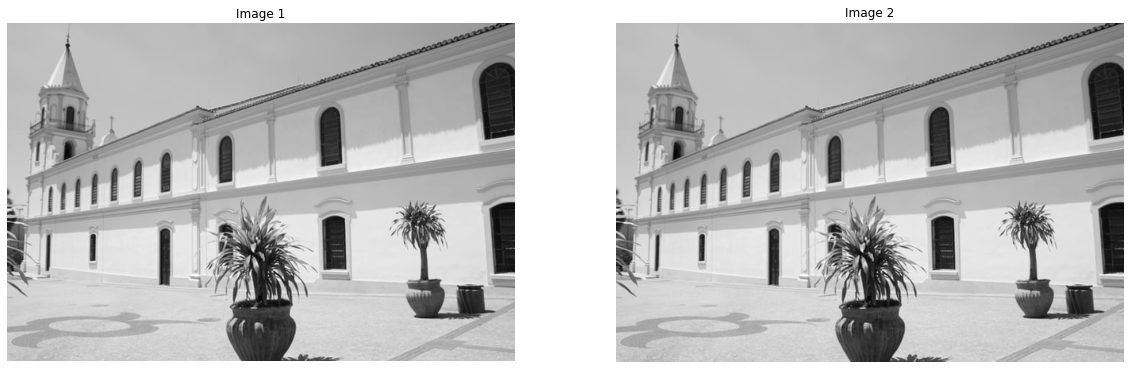

In [14]:
restore_img = restore_image([LL, LH, HL, HH], coeffs2, function)
ShowImage([img_gray, restore_img], 1, 2)

* Xóa thông tin **ảnh horizontal detail** và khôi phục lại ảnh từ **ảnh approximation** và các **ảnh detail** còn lại

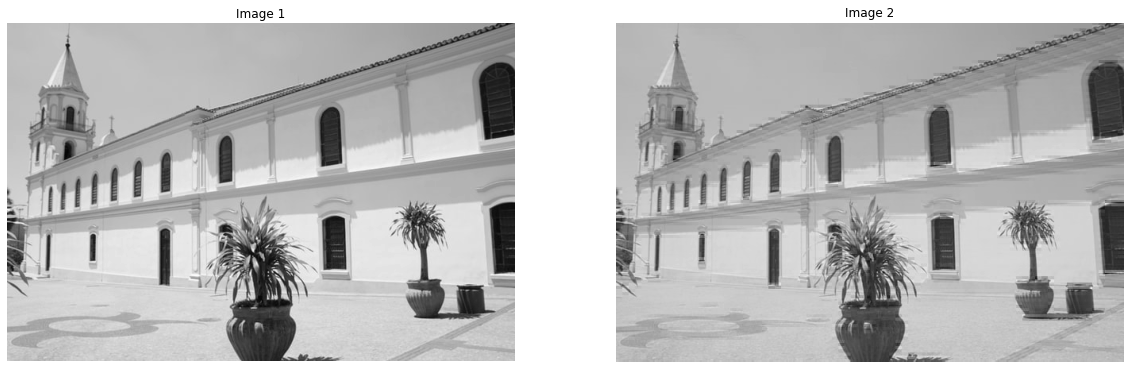

In [15]:
new_LH = np.zeros_like(LH)
restore_img = restore_image([LL, new_LH, HL, HH], coeffs2, function)
ShowImage([img_gray, restore_img], 1, 2)

* Xóa thông tin **ảnh vertical detail** và khôi phục lại ảnh từ **ảnh approximation** và các **ảnh detail** còn lại

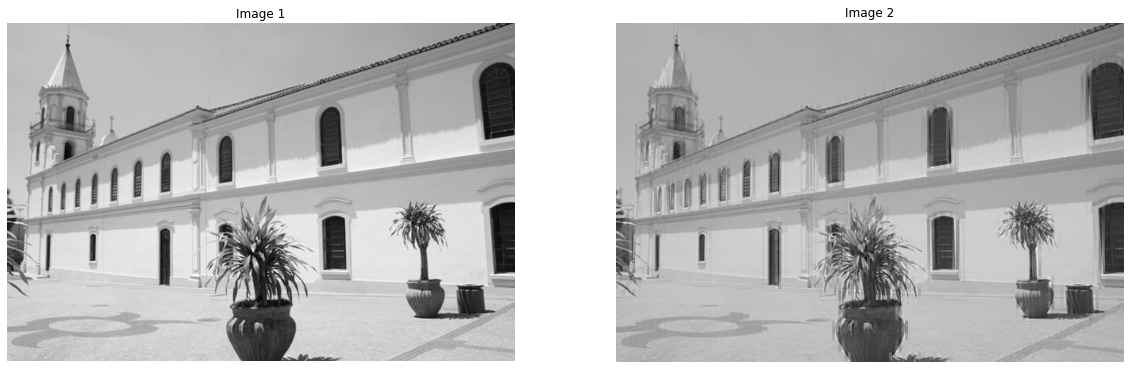

In [16]:
new_HL = np.zeros_like(HL)
restore_img = restore_image([LL, LH, new_HL, HH], coeffs2, function)
ShowImage([img_gray, restore_img], 1, 2)

* Xóa thông tin **ảnh diagonal detail** và khôi phục lại ảnh từ **ảnh approximation** và các **ảnh detail** còn lại

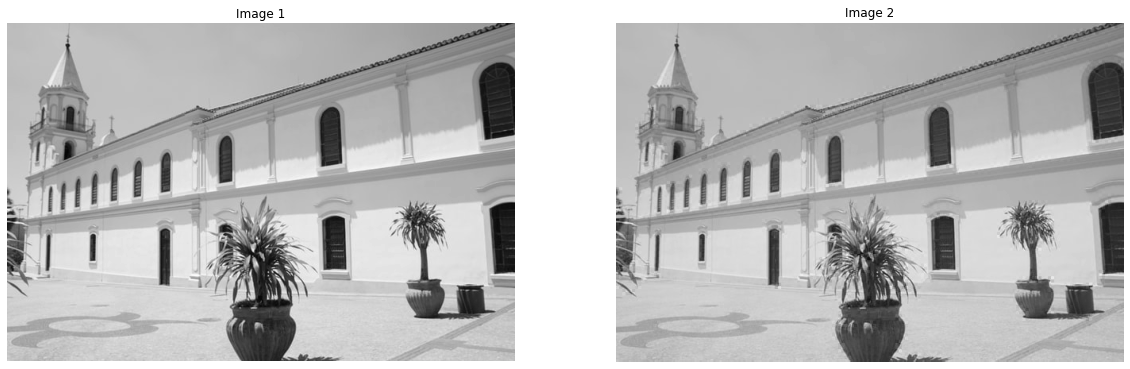

In [17]:
new_HH = np.zeros_like(HH)
restore_img = restore_image([LL, LH, HL, new_HH], coeffs2, function)
ShowImage([img_gray, restore_img], 1, 2)